In [1]:
cnfl=[true]
include("PVCR.jl")

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/arnavgautam/.julia/packages/PyPlot/4wzW1/src/init.jl:192
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:399
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/kAhnQ/src/PyCall.jl:399


12-element Array{Float64,1}:
 42.35930677572868 
 43.0785589650421  
 42.394224465839216
 45.343163807121606
 42.29728640436372 
 42.56605829576826 
 41.027884582241974
 40.784783966947366
 40.47773068077983 
 42.012421645464734
 43.00006019721416 
 40.152405298225425

In [2]:
include("functions/plotting_base_gd.jl")

┌ Info: Recompiling stale cache file /Users/arnavgautam/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184


plot_segmented_tariff_category_with_regression (generic function with 3 methods)

In [3]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} CNFL customers

all_cnfl = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "CNFL"), base_GD)

6923×17 DataFrame. Omitted printing of 13 columns
│ Row  │ ANNO  │ MES   │ ENERGIA_GENERADA │ ENERGIA_DEPOSITADA │
│      │ Int64 │ Int64 │ Float64⍰         │ Float64⍰           │
├──────┼───────┼───────┼──────────────────┼────────────────────┤
│ 1    │ 2018  │ 1     │ 209.0            │ 117.0              │
│ 2    │ 2018  │ 2     │ 235.0            │ 122.0              │
│ 3    │ 2018  │ 3     │ 305.0            │ 169.0              │
│ 4    │ 2018  │ 4     │ 355.0            │ 217.0              │
│ 5    │ 2018  │ 5     │ 338.0            │ 185.0              │
│ 6    │ 2018  │ 1     │ 432.0            │ 296.0              │
│ 7    │ 2018  │ 2     │ 482.0            │ 323.0              │
│ 8    │ 2018  │ 3     │ 614.0            │ 448.0              │
│ 9    │ 2018  │ 4     │ 710.0            │ 547.0              │
│ 10   │ 2018  │ 5     │ 686.0            │ 458.0              │
⋮
│ 6913 │ 2017  │ 12    │ 381.0            │ 225.0              │
│ 6914 │ 2017  │ 12    │ 2.0              │ 0.0                │
│ 6915 │ 2017  │ 12    │ 2770.0           │ 0.0                │
│ 6916 │ 2017  │ 12    │ 5011.0           │ 0.0                │
│ 6917 │ 2017  │ 12    │ 2175.0           │ 0.0                │
│ 6918 │ 2017  │ 12    │ 2.0              │ 0.0                │
│ 6919 │ 2017  │ 12    │ 2165.0           │ 370.0              │
│ 6920 │ 2017  │ 12    │ 2493.0           │ 720.0              │
│ 6921 │ 2017  │ 12    │ 117.0            │ 65.0               │
│ 6922 │ 2017  │ 12    │ 4277.0           │ 0.0                │
│ 6923 │ 2017  │ 12    │ 1160.0           │ 0.0                │

In [8]:
# Function to calculate optimal capacity under various conditions
res_consumption = vcat(100:100:1500, 2000:500:4000)

function get_optimal_capacity(;APR=0.085, years_to_payoff=5)
    new_BAC1 = Financial(0.045, APR, years_to_payoff, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
        res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, res_model_predictions)
end

get_optimal_capacity (generic function with 3 methods)

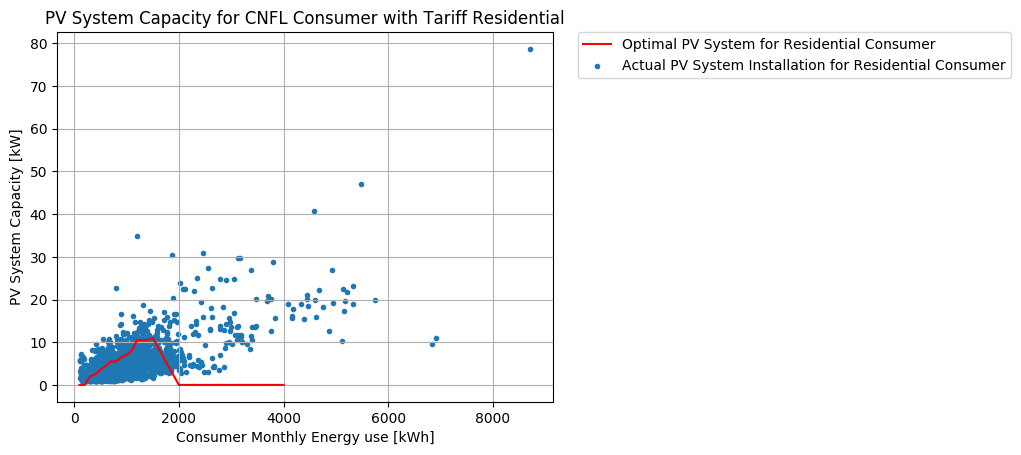

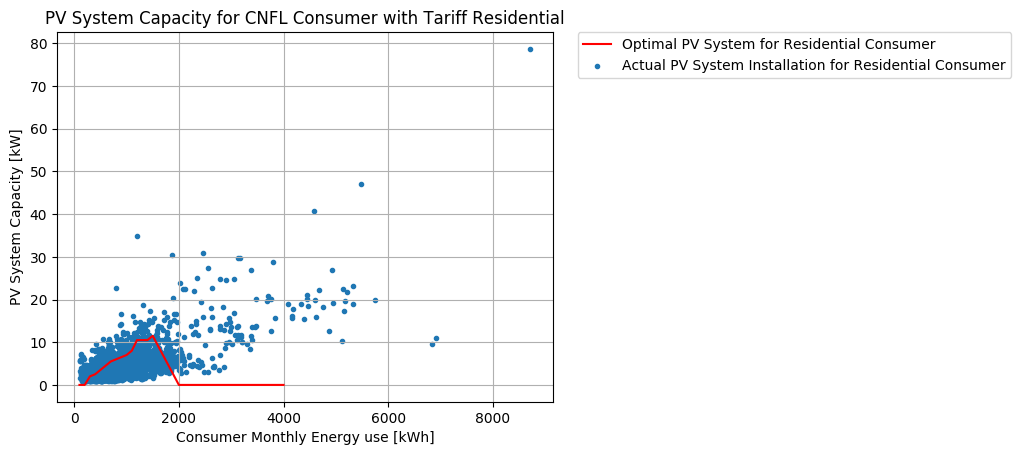

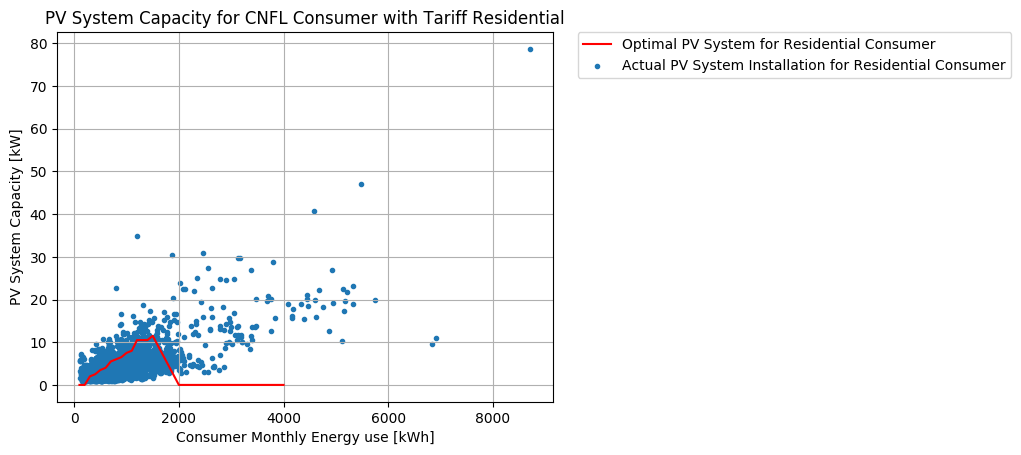

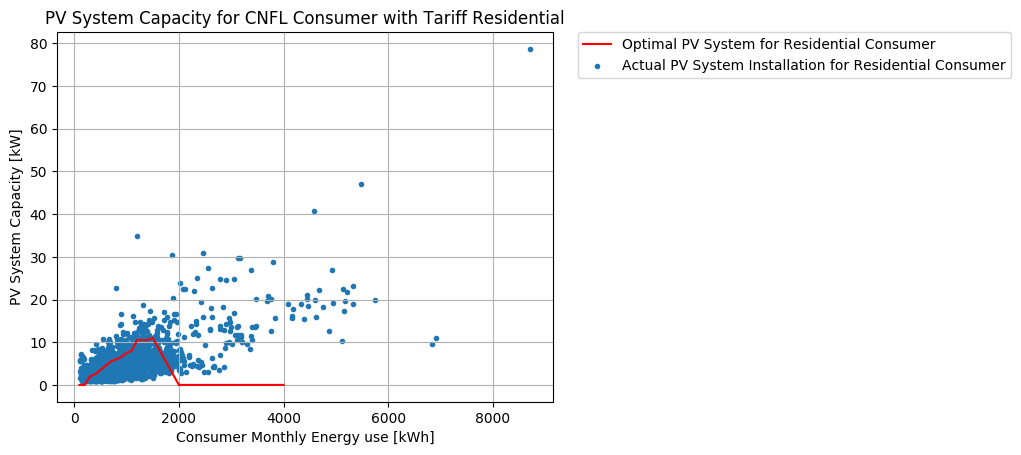

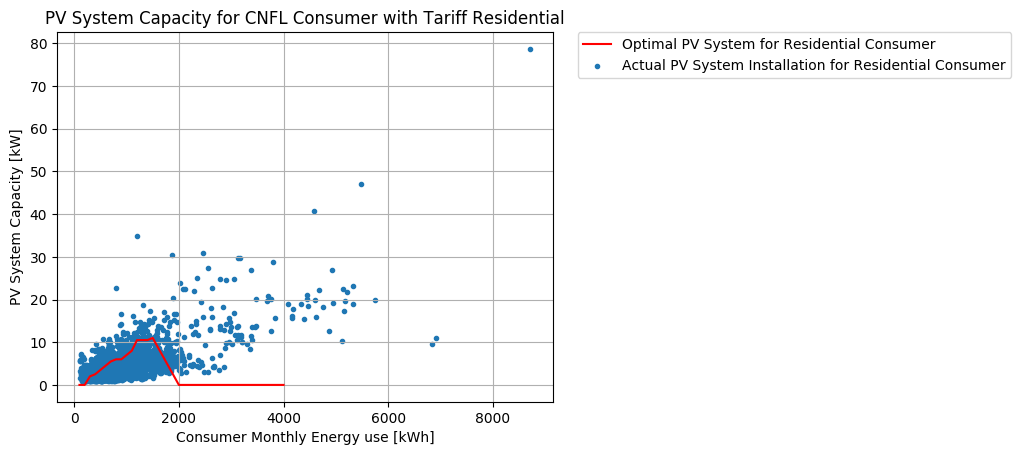

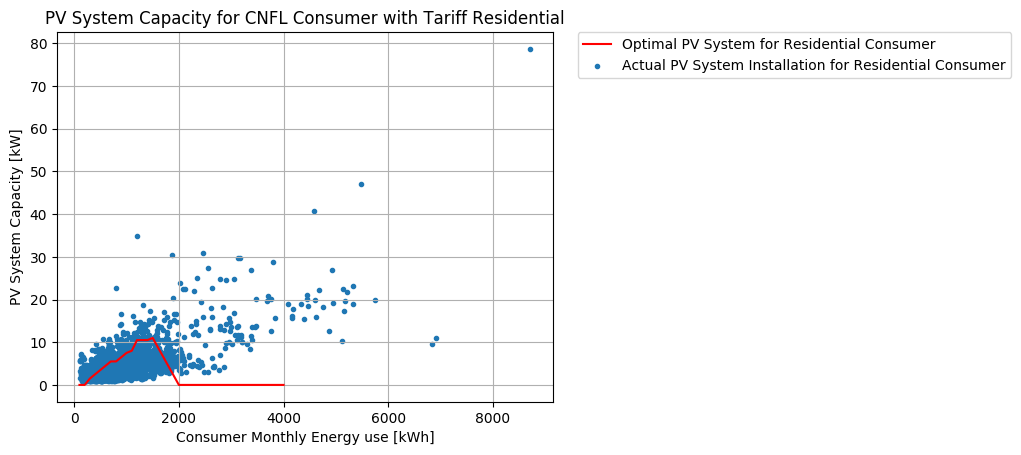

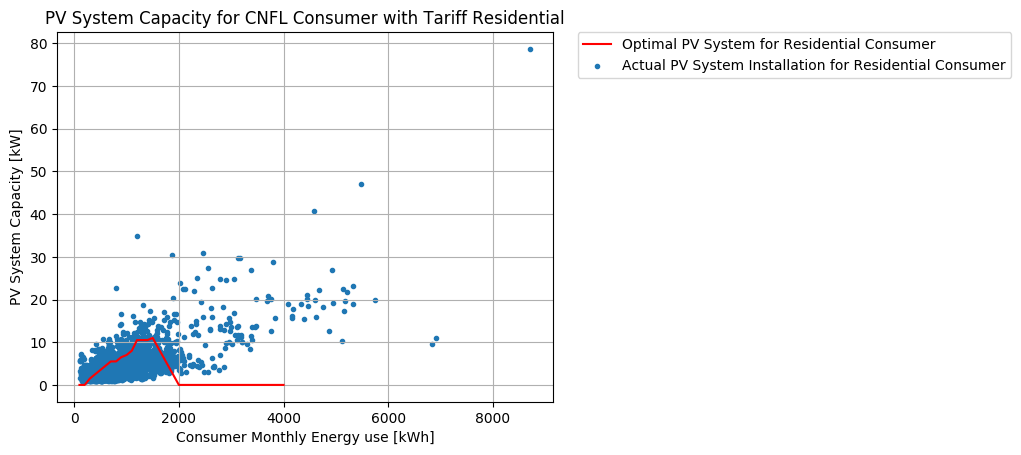

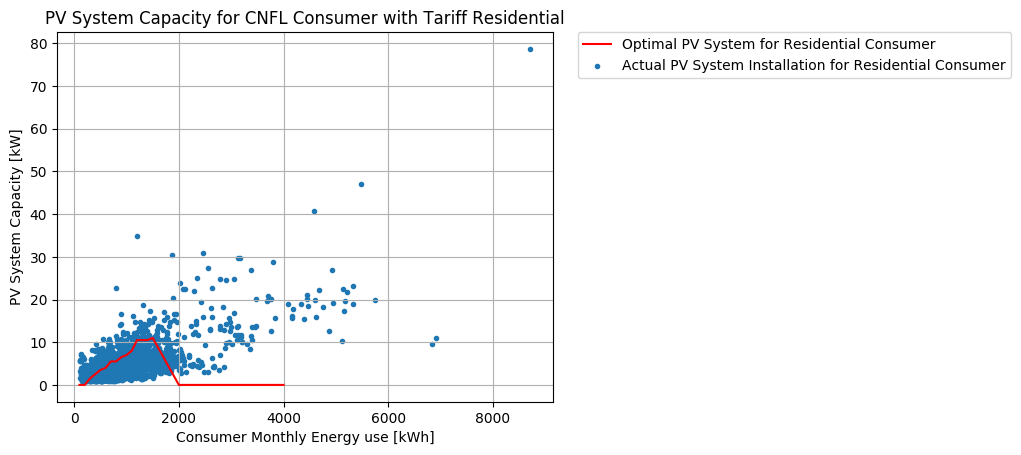

In [10]:
for i in 0.085:0.005:0.12
    get_optimal_capacity(APR=i)
end

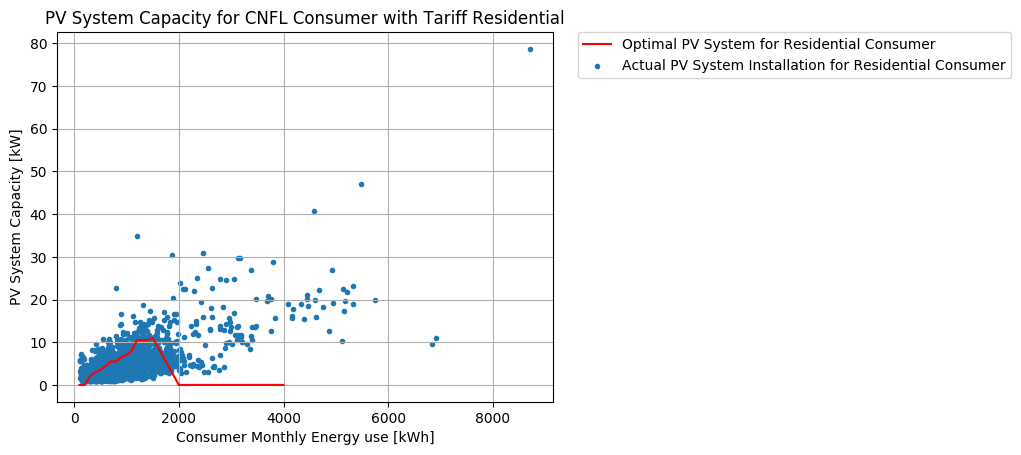

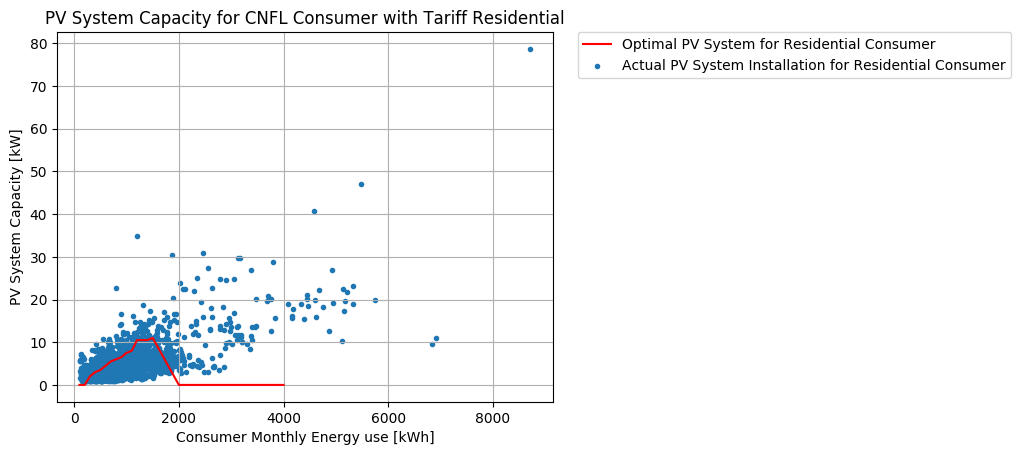

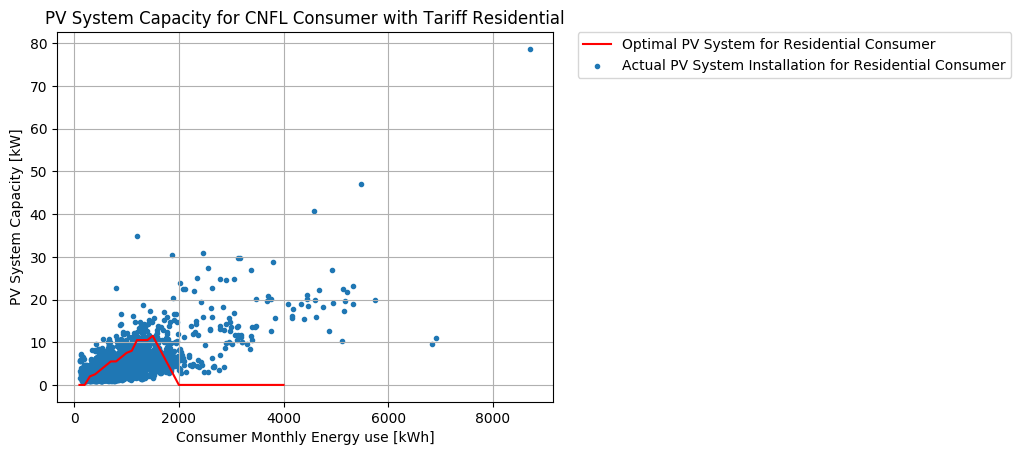

In [11]:
for i in 3:1:5
    get_optimal_capacity(years_to_payoff=i)
end